# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

`The goal of this data task is to identify the key factors that influence used car prices to make more accurate pricing predictions. This information can be used by businesses to make better decisions about pricing their own used cars, as well as to understand the factors that are driving the overall market for used cars.`

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

###### Taking following steps to understand the data :

**Explore the data:** Overview of the data, such as the number of records, the number of columns, and the data types of each column and would also look for any patterns or trends in the data.

**Data Quality Issues :**

* Identify any missing values in the data.
* Identify any duplicate records in the data.
* Identify any outliers in the data and investigate them.
* Check for any inconsistencies in data type and format of the data.

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
vehicles = pd.read_csv('data/vehicles.csv')

In [3]:
# get details about the data, columns, datatypes
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
# check for number of records in the dataset
vehicles.shape

(426880, 18)

In [5]:
vehicles.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [6]:
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [7]:
# check for missing/null values in the dataset
vehicles.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [8]:
# check for duplicate records
vehicles.duplicated().sum()

0

In [9]:
vehicles.price.describe()

count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [10]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

#### Feature Selection

In [11]:
# extracting important columns
vehicles.drop(columns=['id', 'VIN', 'size', 'state'], inplace=True)

In [12]:
vehicles.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Handle Missing Values

In [13]:
vehicles.isna().sum().sort_values(ascending=False)

cylinders       177678
condition       174104
drive           130567
paint_color     130203
type             92858
manufacturer     17646
title_status      8242
model             5277
odometer          4400
fuel              3013
transmission      2556
year              1205
price                0
region               0
dtype: int64

In [14]:
# get the percentage of missing values for each feature

missing_values = vehicles.isna().sum() / vehicles.shape[0]*100
missing_values.sort_values(ascending=False)

cylinders       41.622470
condition       40.785232
drive           30.586347
paint_color     30.501078
type            21.752717
manufacturer     4.133714
title_status     1.930753
model            1.236179
odometer         1.030735
fuel             0.705819
transmission     0.598763
year             0.282281
price            0.000000
region           0.000000
dtype: float64

In [15]:
# dropping the rows where percentage of null values are less than 1.5%
vehicles.dropna(subset=['year', 'transmission', 'fuel', 'odometer', 'model'], inplace=True)

In [16]:
# For missing values in other columns add unknown 
vehicles.fillna('unknown', inplace=True)

In [17]:
# check for duplicates
vehicles.duplicated().sum()

54468

In [18]:
# drop duplicate values
vehicles.drop_duplicates(inplace=True)

In [19]:
vehicles.shape

(357904, 14)

In [20]:
vehicles.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,unknown,pickup,white
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,unknown,pickup,blue
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,unknown,pickup,red
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,unknown,pickup,red
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black


#### Categorical Data Cleaning

In [21]:
region_values = vehicles['region'].value_counts()
region_values

minneapolis / st paul    2876
seattle-tacoma           2808
portland                 2806
SF bay area              2791
sacramento               2777
                         ... 
meridian                   25
southwest MS               14
kansas city                10
fort smith, AR              9
west virginia (old)         8
Name: region, Length: 404, dtype: int64

In [22]:
vehicles['region'] = vehicles['region'].apply(lambda s: s if str(s) in region_values[:50] else 'others')

In [23]:
model_values = vehicles['model'].value_counts()
vehicles['model'] = vehicles['model'].apply(lambda s: s if str(s) in model_values[:50] else 'others')

In [24]:
manufacturer_values = vehicles['manufacturer'].value_counts()
vehicles['manufacturer'] = vehicles['manufacturer'].apply(lambda s: s if str(s) in manufacturer_values[:20] else 'others')

In [25]:
for i in vehicles.columns:
    print(i, len(vehicles[i].value_counts()))

region 51
price 15318
year 113
manufacturer 21
model 51
condition 7
cylinders 9
fuel 5
odometer 103108
title_status 7
transmission 3
drive 4
type 14
paint_color 13


#### Remove Outliers

In [26]:
vehicles.describe()

,price,year,odometer
count,3.579040e+05,357904.000000,3.579040e+05
mean,6.909703e+04,2011.198056,9.679581e+04
std,1.194846e+07,9.501951,2.022818e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.999000e+03,2008.000000,3.594275e+04
50%,1.450000e+04,2014.000000,8.367950e+04
75%,2.699000e+04,2017.000000,1.333492e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [27]:
### detecting/removing outliers for price
iqr = vehicles['price'].quantile(.75) - vehicles['price'].quantile(.25)
lower = vehicles['price'].quantile(.25) - 1.5*iqr
upper = vehicles['price'].quantile(.75) + 1.5*iqr
vehicles_price_outliers = vehicles.loc[(vehicles['price'] <= lower) | (vehicles['price'] >= upper)]
vehicles_new = vehicles.loc[(vehicles['price'] > lower) & (vehicles['price'] < upper)]
print('vehicles with price outliers : ', vehicles_price_outliers.shape)
print('vehicles with no price outliers : ', vehicles_new.shape)

vehicles with price outliers :  (6238, 14)
vehicles with no price outliers :  (351666, 14)


In [28]:
vehicles_new.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
27,others,33590,2014.0,gmc,others,good,8 cylinders,gas,57923.0,clean,other,unknown,pickup,white
28,others,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,unknown,pickup,blue
29,others,39590,2020.0,chevrolet,others,good,8 cylinders,gas,19160.0,clean,other,unknown,pickup,red
30,others,30990,2017.0,toyota,others,good,8 cylinders,gas,41124.0,clean,other,unknown,pickup,red
31,others,15000,2013.0,ford,others,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black


In [29]:
### detecting/removing outliers for odometer
iqr = vehicles_new['odometer'].quantile(.75) - vehicles_new['odometer'].quantile(.25)
lower = vehicles_new['odometer'].quantile(.25) - 1.5*iqr
upper = vehicles_new['odometer'].quantile(.75) + 1.5*iqr
vehicles_odometer_outliers = vehicles_new.loc[(vehicles['odometer'] <= lower) | (vehicles_new['odometer'] >= upper)]
vehicles_new = vehicles_new.loc[(vehicles_new['odometer'] > lower) & (vehicles_new['odometer'] < upper)]
print('vehicles with no outliers : ', vehicles_new.shape)
print('vehicles with outliers : ', vehicles_odometer_outliers.shape)

vehicles with no outliers :  (348152, 14)
vehicles with outliers :  (3514, 14)


### Data Visualization

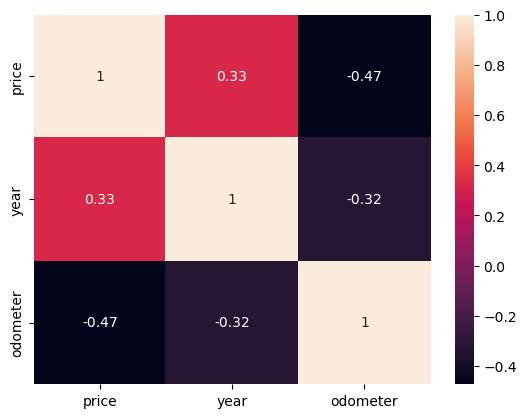

In [105]:
#Visualizing data correlation using heatmap.
sns.heatmap(vehicles_new.corr(), annot=True)
plt.savefig('images/heatmap.png')
plt.show()

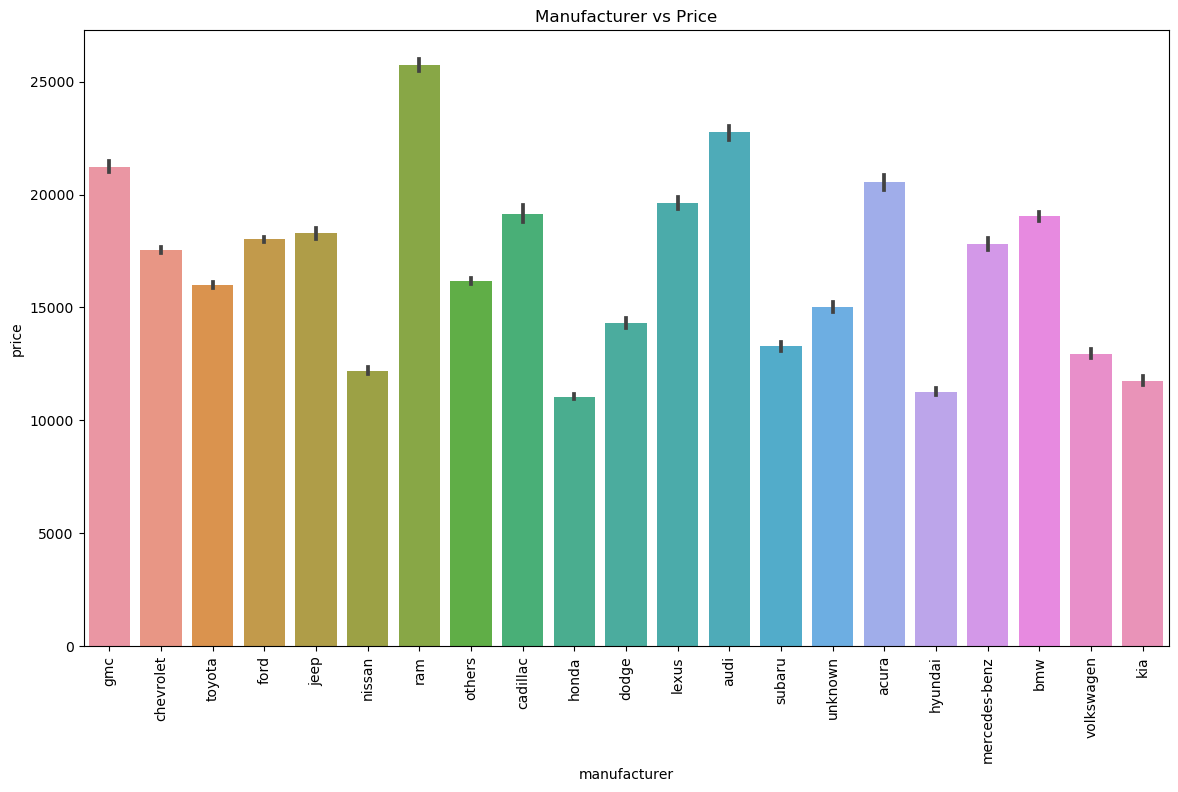

In [89]:
fig = plt.figure(figsize=(14,8))
ax = sns.barplot(data=vehicles_new, x='manufacturer', y='price')
ax.set_title('Manufacturer vs Price')
plt.xticks(rotation=90)
plt.savefig('images/manufacturer_price.png')
plt.show()

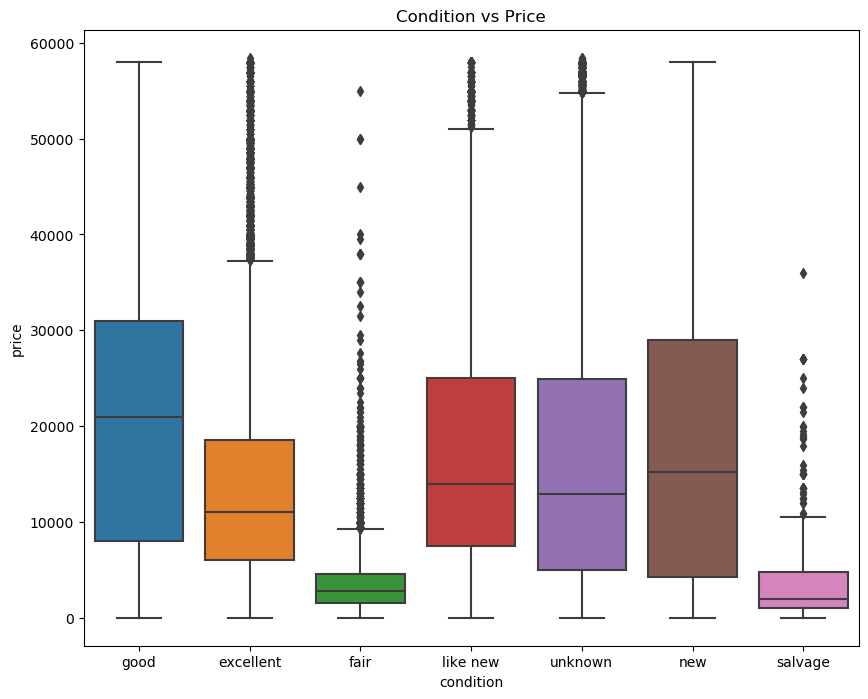

In [86]:
fig = plt.figure(figsize=(10,8))
ax = sns.boxplot(data=vehicles_new, x='condition', y='price')
ax.set_title('Condition vs Price')
plt.savefig('images/condition_price.png')
plt.show()

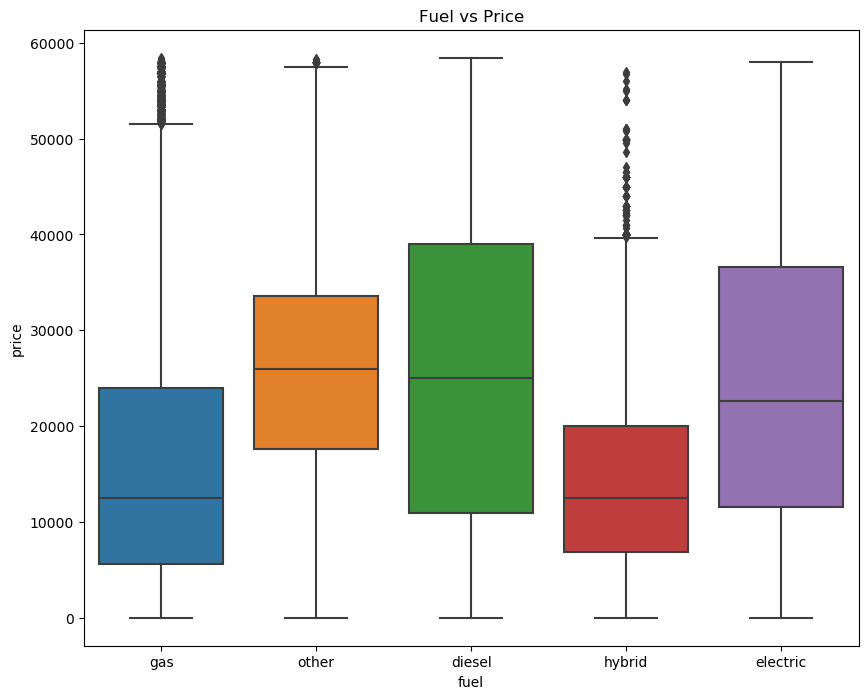

In [87]:
fig = plt.figure(figsize=(10,8))
ax = sns.boxplot(data=vehicles_new, x='fuel', y='price')
ax.set_title('Fuel vs Price')
plt.savefig('images/fuel_price.png')
plt.show()

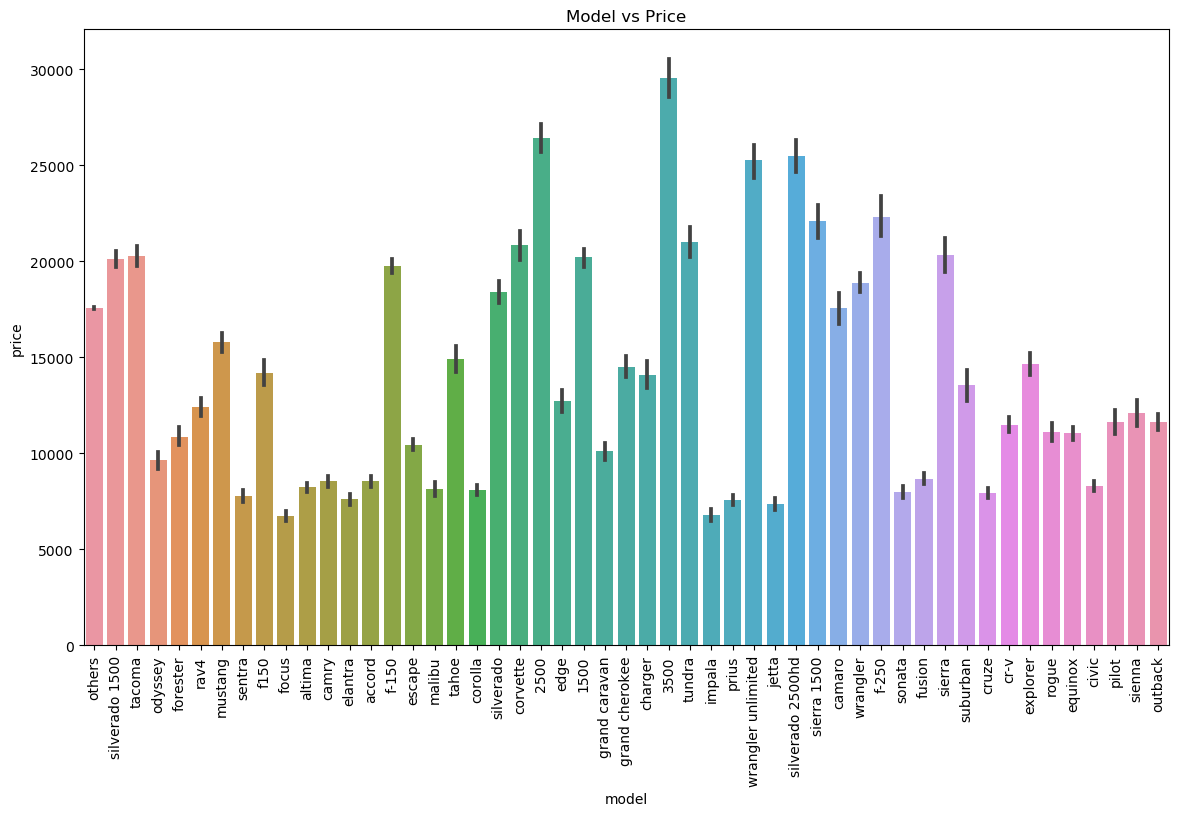

In [88]:
fig = plt.figure(figsize=(14,8))
ax = sns.barplot(data=vehicles_new, x='model', y='price')
ax.set_title('Model vs Price')
plt.xticks(rotation=90)
plt.savefig('images/model_price.png')
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

####  Prepare Datasets for Model

In [35]:
X = vehicles_new.drop('price', axis=1)
y = vehicles_new['price']

print('Features : ', X.shape)
print('Target  : ', y.shape)

Features :  (348152, 13)
Target  :  (348152,)


In [36]:
col_transformer = make_column_transformer((OneHotEncoder(sparse=False, drop = 'if_binary'), ['model', 'region', 'manufacturer', 'fuel', 'cylinders','title_status', 'transmission', 'drive', 'type', 'paint_color']),
                                          (OrdinalEncoder(categories = [['salvage', 'fair', 'unknown', 'good', 'excellent', 'like new', 'new']]), ['condition']),
                                          remainder='passthrough')

In [37]:
#Train and Test Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [76]:
X_train_trans = col_transformer.fit_transform(X_train)
X_test_trans = col_transformer.fit_transform(X_test)

#### Function to Process Results 

In [39]:
# Function to process the result of each model
def process_result(y_test, y_pred):
    result=[]
    result.append('%.4f' % r2_score(y_test,y_pred))
    result.append('%.4f' % (r2_score(y_test,y_pred)*100))
    result.append('%.2f' % mean_squared_error(y_test, y_pred))
    result.append('%.2f' % mean_absolute_error(y_test, y_pred))
    result.append('%.2f' % np.sqrt(mean_squared_error(y_test, y_pred))) 
    return (result)

In [40]:
#dataframe that store the performance of each model
score_data = pd.DataFrame(index=['R2 Score', 'Accuracy(%)', 'Mean Squared Error', 'Mean Absolute Error', 'Root MSE'])

#### Linear Regression Model

In [41]:
pipe = Pipeline([
    ('col_transformer', col_transformer),
    ('linreg', LinearRegression())
])
pipe.fit(X_train, y_train)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False),
                                                  ['model', 'region',
                                                   'manufacturer', 'fuel',
                                                   'cylinders', 'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                        

In [42]:
pred_train = pipe.predict(X_train)
pred_test = pipe.predict(X_test)

score_lr = process_result(y_test, pred_test)
score_data['Linear Regression'] = score_lr
print('R2_score: ', score_lr[0])
print('Mean squared error: ', score_lr[2])
print('Mean absolute error: ', score_lr[3])
print('Root mean squared error: ', score_lr[4])

R2_score:  0.4631
Mean squared error:  92758679.05
Mean absolute error:  6844.27
Root mean squared error:  9631.13


#### Polynomial Regression Model

In [43]:
# Find the best polynomial degree
test_mses = []
#for degree in 1 - 5
for i in range(1, 6):
    #create pipeline with PolynomialFeatures degree i
    poly_col_transformer = make_column_transformer((OneHotEncoder(sparse=False, drop = 'if_binary'), ['model', 'region', 'manufacturer', 'fuel', 'cylinders','title_status', 'transmission', 'drive', 'type', 'paint_color']),
                                           (OrdinalEncoder(categories = [['salvage', 'fair', 'unknown', 'good', 'excellent', 'like new', 'new']]), ['condition']),
                                           (PolynomialFeatures(include_bias = False, degree = i), ['year', 'odometer']))
    pipe_poly = Pipeline([('poly_col_transformer', poly_col_transformer), ('linreg', LinearRegression())])
    pipe_poly.fit(X_train, y_train)

    #predict on test
    test_pred = pipe_poly.predict(X_test)
    test_mses.append(mean_squared_error(y_test, test_pred))

best_complexity = test_mses.index(min(test_mses)) + 1
best_mse = min(test_mses)

print(f'The best degree polynomial model is:  {best_complexity}')
print(f'The smallest mean squared error on the test data is : {best_mse: .2f}')

The best degree polynomial model is:  2
The smallest mean squared error on the test data is :  86144810.33


In [44]:
# Run the model with best complexity
poly_col_transformer = make_column_transformer((OneHotEncoder(sparse=False, drop = 'if_binary'), ['model', 'region', 'manufacturer', 'fuel', 'cylinders','title_status', 'transmission', 'drive', 'type', 'paint_color']),
                                           (OrdinalEncoder(categories = [['salvage', 'fair', 'unknown', 'good', 'excellent', 'like new', 'new']]), ['condition']),
                                           (PolynomialFeatures(include_bias = False, degree = 2), ['year', 'odometer']))

pipe_poly = Pipeline([('poly_col_transformer', poly_col_transformer), 
                  ('linreg', LinearRegression())])
pipe_poly.fit(X_train, y_train)

pred_test = pipe_poly.predict(X_test)
score_poly = process_result(y_test, pred_test)
score_data['Linear Regression - Polynomial Degree 2'] = score_poly
print('R2_score: ', score_poly[0])
print('Mean squared error: ', score_poly[2])
print('Mean absolute error: ', score_poly[3])
print('Root mean squared error: ', score_poly[4])

R2_score:  0.5013
Mean squared error:  86144810.33
Mean absolute error:  6390.94
Root mean squared error:  9281.42


#### Ridge Regression

In [48]:
ridge_param_dict = {'ridge__alpha': np.logspace(0, 10, 50)}
ridge_pipe = Pipeline([('col_transformer', col_transformer),
                       ('scaler', StandardScaler()), 
                      ('ridge', Ridge())])
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict)
ridge_grid.fit(X_train, y_train)
pred_test = ridge_grid.predict(X_test)

score_ridge = process_result(y_test, pred_test)
score_data['Ridge Regressor'] = score_ridge
print('R2_score: ', score_ridge[0])
print('Mean squared error: ', score_ridge[2])
print('Mean absolute error: ', score_ridge[3])
print('Root mean squared error: ', score_ridge[4])

R2_score:  0.4634
Mean squared error:  92698510.24
Mean absolute error:  6841.83
Root mean squared error:  9628.01


#### Lasso Regression

In [68]:
lasso_pipe = Pipeline([('col_transformer', col_transformer), 
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(alpha=0.001))])
lasso_pipe.fit(X_train, y_train)
pred_test = lasso_pipe.predict(X_test)

score_lasso = process_result(y_test, pred_test)
score_data['Lasso Regressor'] = score_lasso
print('R2_score: ', score_lasso[0])
print('Mean squared error: ', score_lasso[2])
print('Mean absolute error: ', score_lasso[3])
print('Root mean squared error: ', score_lasso[4])

R2_score:  0.4634
Mean squared error:  92700760.72
Mean absolute error:  6841.56
Root mean squared error:  9628.12


#### Linear Regressor with Sequential Feature Selection

In [70]:
sequential_pipe = Pipeline([('poly_col_transformer', poly_col_transformer),
                           ('selector', SequentialFeatureSelector(LinearRegression(), 
                                                                  n_features_to_select=6)),
                           ('linreg', LinearRegression())])
sequential_pipe.fit(X_train, y_train)
pred_test = sequential_pipe.predict(X_test)

score_sfs = process_result(y_test, pred_test)
score_data['Linear Regressor with SFS'] = score_sfs
print('R2_score: ', score_sfs[0])
print('Mean squared error: ', score_sfs[2])
print('Mean absolute error: ', score_sfs[3])
print('Root mean squared error: ', score_sfs[4])

R2_score:  0.4122
Mean squared error:  101542236.54
Mean absolute error:  7290.86
Root mean squared error:  10076.82


#### Lasso as FeatureSelector

In [74]:
lasso_sfs_pipe = Pipeline([('poly_col_transformer', poly_col_transformer),
                                ('scaler', StandardScaler()),
                                ('selector', SelectFromModel(Lasso())),
                                    ('linreg', LinearRegression())])
lasso_sfs_pipe.fit(X_train, y_train)
pred_test = lasso_sfs_pipe.predict(X_test)

score_lasso_sfs = process_result(y_test, pred_test)
score_data['Linear Regressor with Lasso FeatureSelector'] = score_lasso_sfs
print('R2_score: ', score_lasso_sfs[0])
print('Mean squared error: ', score_lasso_sfs[2])
print('Mean absolute error: ', score_lasso_sfs[3])
print('Root mean squared error: ', score_lasso_sfs[4])

R2_score:  0.5013
Mean squared error:  86145045.21
Mean absolute error:  6390.91
Root mean squared error:  9281.44


#### Random Forest Regressor

In [78]:
random_forest_regressor = RandomForestRegressor(n_estimators=150,random_state=0, min_samples_leaf=1, max_features=0.3, n_jobs=-1, oob_score=True)
random_forest_regressor.fit(X_train_trans, y_train)
pred_test = random_forest_regressor.predict(X_test_trans)

score_rfr = process_result(y_test, pred_test)
score_data['Random Forest Regression'] = score_rfr
print('R2 score: ', score_rfr[0])
print('Mean squared error: ', score_rfr[2])
print('Mean absolute error: ', score_rfr[3])
print('Root mean squared error: ', score_rfr[4])

R2 score:  0.7982
Mean squared error:  34868501.26
Mean absolute error:  3055.79
Root mean squared error:  5904.96


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Now that we have built some models, we can compare and verify the performance of each model, result of cross validation for each model is added into score_data for the final review. 

As a part of cross validation, each model is evaluated using various metrics such as R2 score, Accuracy in percentage, Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE). We can generate basic report of all models and effectiveness and share with client (car dealer) to fine tune their invetory and pricing. 

Performance of Linear regressor, Ridge regressor and Lasso regressor was average with Accuracy ~46% and yielding high Mean Squared Error.

Polynomial Linear regressor and Linear regressor with Lasso feature selector performed better than other models with Accuracy ~50% and MSE of 86144810.33 and 86145045.21 respectively.

Random forest regressor model performed best out of all models with Accuracy 79.8% and lower MSE of 34868501.26

In [90]:
score_data

,Linear Regression,Linear Regression - Polynomial Degree 2,Ridge Regressor,Lasso Regressor,Linear Regressor with SFS,Linear Regressor with Lasso FeatureSelector,Random Forest Regression
R2 Score,0.4631,0.5013,0.4634,0.4634,0.4122,0.5013,0.7982
Accuracy(%),46.3065,50.1350,46.3414,46.3401,41.2222,50.1348,79.8163
Mean Squared Error,92758679.05,86144810.33,92698510.24,92700760.72,101542236.54,86145045.21,34868501.26
Mean Absolute Error,6844.27,6390.94,6841.83,6841.56,7290.86,6390.91,3055.79
Root MSE,9631.13,9281.42,9628.01,9628.12,10076.82,9281.44,5904.96


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

We can share the following information on the performance of all models along with analysis report of actual and predicted for best model choosen.

In [91]:
score_data

,Linear Regression,Linear Regression - Polynomial Degree 2,Ridge Regressor,Lasso Regressor,Linear Regressor with SFS,Linear Regressor with Lasso FeatureSelector,Random Forest Regression
R2 Score,0.4631,0.5013,0.4634,0.4634,0.4122,0.5013,0.7982
Accuracy(%),46.3065,50.1350,46.3414,46.3401,41.2222,50.1348,79.8163
Mean Squared Error,92758679.05,86144810.33,92698510.24,92700760.72,101542236.54,86145045.21,34868501.26
Mean Absolute Error,6844.27,6390.94,6841.83,6841.56,7290.86,6390.91,3055.79
Root MSE,9631.13,9281.42,9628.01,9628.12,10076.82,9281.44,5904.96


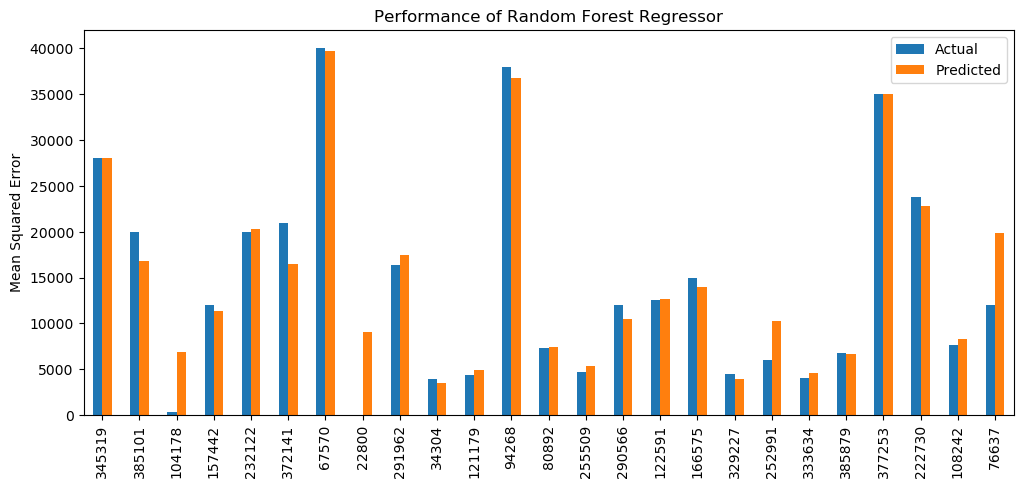

In [101]:
# Best model (Random Forest Regressor) analysis
df_rfr = pd.DataFrame({'Actual': y_test, 'Predicted': pred_test})
df_rfr = df_rfr.sample(25)
df_rfr.plot(kind='bar',figsize=(12,5))
plt.title('Performance of Random Forest Regressor')
plt.ylabel('Mean Squared Error')
plt.savefig('images/random_forest_regressor_performance.png')
plt.show()